In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sales = pd.read_csv('home_data.csv')

In [3]:
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
sales2 =sales[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode','price']]

In [5]:
sales2.isnull().sum() * 100 / len(sales)

bedrooms       0.0
bathrooms      0.0
sqft_living    0.0
sqft_lot       0.0
floors         0.0
zipcode        0.0
price          0.0
dtype: float64

In [6]:
f = sales2[(sales2['sqft_lot']>=2000 )& (sales2['sqft_lot']<=4000)]

In [7]:
len(f)

2018

In [8]:
f

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,price
26,3,1.75,2450,2691,2.0,98119,937000
30,3,2.50,2320,3980,2.0,98027,580500
33,3,1.00,1090,3000,1.5,98117,535000
35,3,2.50,2300,3060,1.5,98115,696000
43,3,1.00,1570,2280,2.0,98119,685000
...,...,...,...,...,...,...,...
21559,2,2.50,1590,2656,2.0,98106,305000
21566,4,3.00,1670,2642,2.0,98109,710200
21577,4,3.25,1900,2631,2.0,98144,579000
21591,4,2.75,2770,3852,2.0,98178,572000


In [9]:
print(f.groupby('sqft_lot').count() / len(f))

          bedrooms  bathrooms  sqft_living    floors   zipcode     price
sqft_lot                                                                
2000      0.002478   0.002478     0.002478  0.002478  0.002478  0.002478
2001      0.000496   0.000496     0.000496  0.000496  0.000496  0.000496
2002      0.000991   0.000991     0.000991  0.000991  0.000991  0.000991
2003      0.001487   0.001487     0.001487  0.001487  0.001487  0.001487
2006      0.000496   0.000496     0.000496  0.000496  0.000496  0.000496
...            ...        ...          ...       ...       ...       ...
3995      0.000991   0.000991     0.000991  0.000991  0.000991  0.000991
3996      0.000991   0.000991     0.000991  0.000991  0.000991  0.000991
3997      0.000496   0.000496     0.000496  0.000496  0.000496  0.000496
3999      0.000496   0.000496     0.000496  0.000496  0.000496  0.000496
4000      0.124381   0.124381     0.124381  0.124381  0.124381  0.124381

[772 rows x 6 columns]


In [10]:
sales2['zipcode'].mean()

98077.93980474715

In [11]:
sales2.shape

(21613, 7)

In [12]:
sales2.describe()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,zipcode,price
count,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,2.161300e+04
mean,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,98077.939805,5.400881e+05
std,0.930062,0.770163,918.440897,4.142051e+04,0.539989,53.505026,3.671272e+05
min,0.000000,0.000000,290.000000,5.200000e+02,1.000000,98001.000000,7.500000e+04
25%,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,98033.000000,3.219500e+05
50%,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,98065.000000,4.500000e+05
75%,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,98118.000000,6.450000e+05
max,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,98199.000000,7.700000e+06


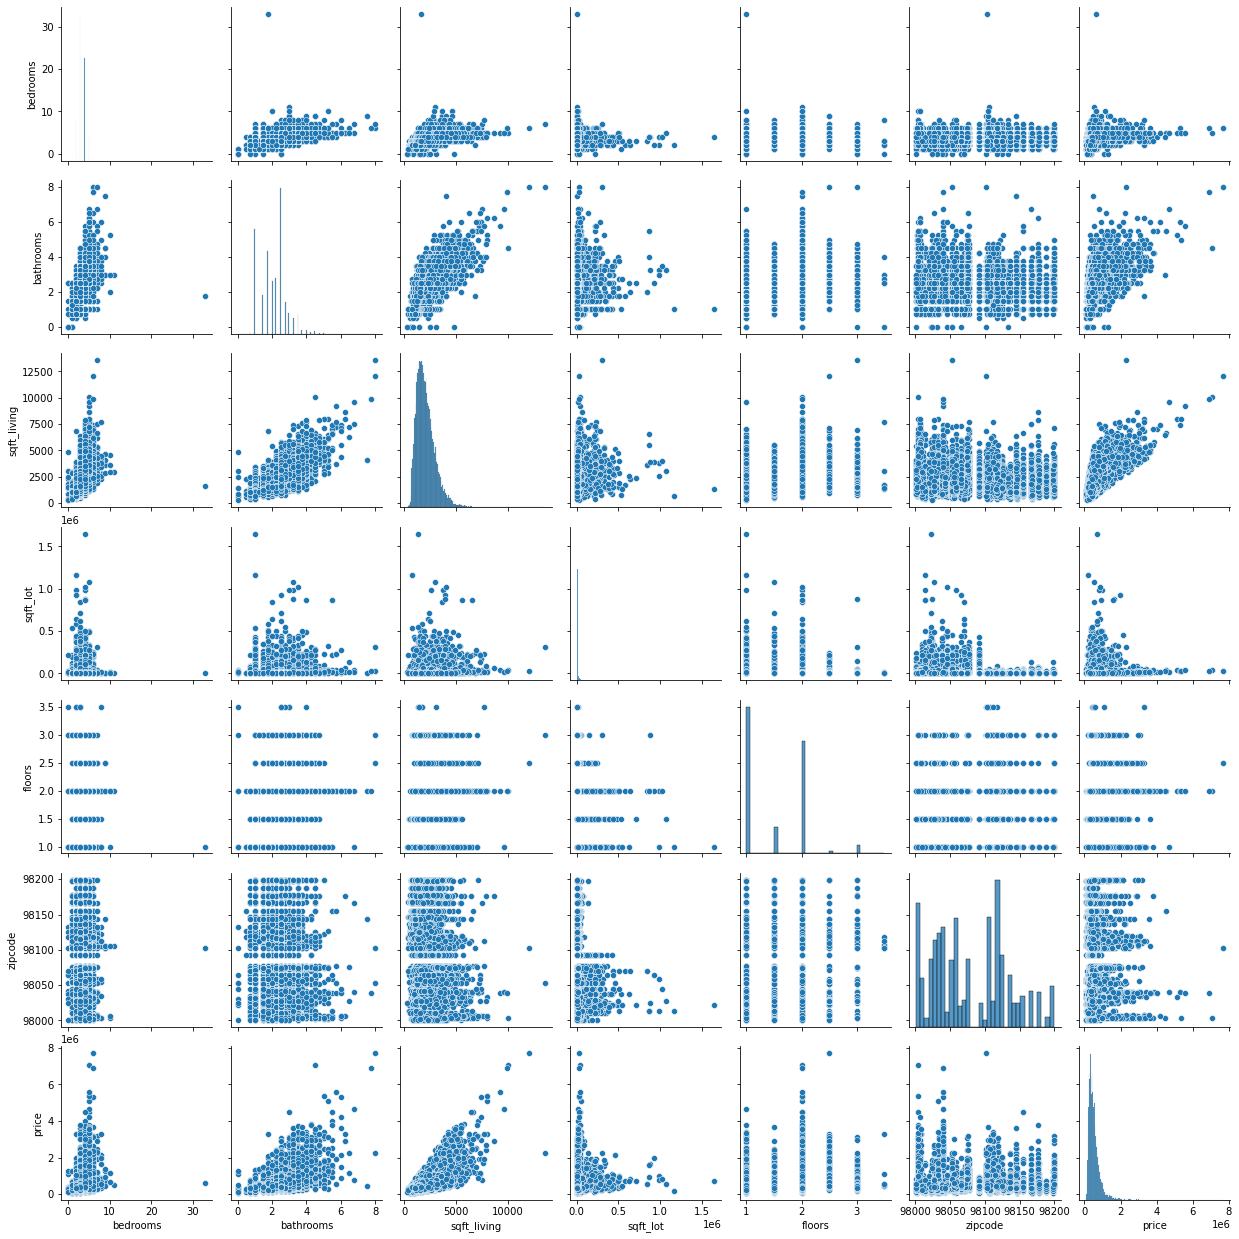

In [13]:
sns.pairplot(sales2)

In [14]:
d =sales2 [['sqft_lot']]
x=sales2[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',]]
y=sales2['price']
z=sales2['price']

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=1)

In [16]:
d_train, d_test, z_train, z_test = train_test_split(d,z, test_size=0.3, random_state=1)

In [17]:
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [18]:
reg = LinearRegression()
reg.fit(d_train, z_train)

LinearRegression()

In [19]:
print(regressor.coef_)

[-5.34839464e+04  1.15675546e+04  3.07710863e+02 -2.88151428e-01
 -1.19979671e+03  5.93343588e+02]


In [20]:
print(reg.coef_)

[0.65651154]


In [21]:
coef = pd.DataFrame(data =regressor.coef_, index= x.columns, columns=['Coefficients'] )

In [22]:
df1 =pd.DataFrame(data =reg.coef_, index= d.columns, columns=['Coefficients'] )

In [23]:
coef

,Coefficients
bedrooms,-53483.946368
bathrooms,11567.554560
sqft_living,307.710863
sqft_lot,-0.288151
floors,-1199.796709
zipcode,593.343588


In [24]:
df1

,Coefficients
sqft_lot,0.656512


In [25]:
predictions = regressor.predict(x_test)

In [26]:
pred = reg.predict(d_test)

In [27]:
print('MAE:', metrics.mean_absolute_error(y_test,predictions))
print('MSE:', metrics.mean_squared_error(y_test,predictions))
print('RMsE:', np.sqrt(metrics.mean_squared_error(y_test,predictions)))

MAE: 169850.08281190664
MSE: 74276862107.27985
RMsE: 272537.8177561416


In [28]:
print('MAE:', metrics.mean_absolute_error(z_test,pred))
print('MSE:', metrics.mean_squared_error(z_test,pred))
print('RMsE:', np.sqrt(metrics.mean_squared_error(z_test,pred)))

MAE: 238273.7424930619
MSE: 154517377034.8411
RMsE: 393086.984056762


In [29]:
import statsmodels.api as sm

In [31]:
x = sm.add_constant(x)
model = sm.OLS(y,x).fit()
pred = model.predict(x)
print_model = model.summary()

In [32]:
print_model

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.515
Model:                            OLS   Adj. R-squared:                  0.515
Method:                 Least Squares   F-statistic:                     3826.
Date:                Fri, 02 Apr 2021   Prob (F-statistic):               0.00
Time:                        13:03:50   Log-Likelihood:            -2.9978e+05
No. Observations:               21613   AIC:                         5.996e+05
Df Residuals:                   21606   BIC:                         5.996e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -5.568e+07   3.29e+06    -16.929      0.000   -6.21e+07   -4.92e+07
bedrooms    -5.798e+04   2337.351    -24.806      0.000   -6.26e+04   -5.34e+04
bathrooms    1.284e+04   3799.809      3.380      0.001    5395.804    2.03e+04
sqft_living   316.1849      3.113    101.559      0.000     310.083     322.287
sqft_lot       -0.3018      0.043     -6.992      0.000      -0.386      -0.217
floors      -4202.1526   3753.498     -1.120      0.263   -1.16e+04    3154.980
zipcode       568.3882     33.526     16.954      0.000     502.674     634.102
==============================================================================
Omnibus:                    14421.893   Durbin-Watson:                   1.985
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           492355.277
Skew:                           2.732   Prob(JB):                         0.00
Kurtosis:                      25.735   Cond. No.                     1.88e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.88e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""